### Standard slicing

#### Surface slicing: From shed coordinates

In [10]:
from cfdmod.use_cases.altimetry import AltimetrySection, Shed
import trimesh
import numpy as np

surface_mesh: trimesh.Trimesh = trimesh.load_mesh("./fixtures/tests/altimetry/terrain.stl")

shed_start = np.array([193,167,830], dtype=np.float32)
shed_end = np.array([65.9,167,830], dtype=np.float32)

shed = Shed(start_coordinate=shed_start, end_coordinate=shed_end)

altimetry_section = AltimetrySection.from_points("example", shed_start, shed_end)
altimetry_section.slice_surface(surface_mesh)
altimetry_section.include_shed(shed)

surface_mesh, "Shed section profile:", altimetry_section.section_sheds[0].profile, "Section profile:", altimetry_section.section_vertices.pos[:10]

(<trimesh.Trimesh(vertices.shape=(18899, 3), faces.shape=(37304, 3))>,
 'Shed section profile:',
 (array([773.1893645 , 773.1893645 , 900.28936298, 900.28936298]),
  array([830., 845., 845., 830.])),
 'Section profile:',
 array([[-966.09736914,  167.        ,  855.10865749],
        [-962.98798518,  167.        ,  855.01024001],
        [-955.67935982,  167.        ,  854.75110316],
        [-951.70151381,  167.        ,  854.44965002],
        [-942.15206599,  167.        ,  853.57271115],
        [-936.06816609,  167.        ,  853.05939951],
        [-928.73314296,  167.        ,  852.44986723],
        [-918.48714138,  167.        ,  851.78153494],
        [-916.3657208 ,  167.        ,  851.65032959],
        [-911.38540774,  167.        ,  851.55485013]]))

#### Surface slicing: From plane description

In [9]:
plane_normal = np.array([1,0,0])
plane_origin = np.array([0,0,820])

new_section = AltimetrySection("example", plane_origin, plane_normal)
new_section.slice_surface(surface_mesh)

surface_mesh, "Section profile:", new_section.section_vertices.pos[:10]

(<trimesh.Trimesh(vertices.shape=(18899, 3), faces.shape=(37304, 3))>,
 'Section profile:',
 array([[ 0.00000000e+00, -9.66099976e+02,  7.68707400e+02],
        [ 0.00000000e+00, -9.59489405e+02,  7.70201331e+02],
        [ 0.00000000e+00, -9.55827725e+02,  7.70990272e+02],
        [ 0.00000000e+00, -9.44357497e+02,  7.73947109e+02],
        [ 0.00000000e+00, -9.43097560e+02,  7.74278039e+02],
        [ 0.00000000e+00, -9.41684198e+02,  7.74748996e+02],
        [ 0.00000000e+00, -9.28990673e+02,  7.79015915e+02],
        [ 8.88178420e-16, -9.24571502e+02,  7.81001443e+02],
        [ 0.00000000e+00, -9.16503535e+02,  7.84776440e+02],
        [ 0.00000000e+00, -9.12040002e+02,  7.87014302e+02]]))

#### Plotting and saving

##### Altimetry profiles plotting

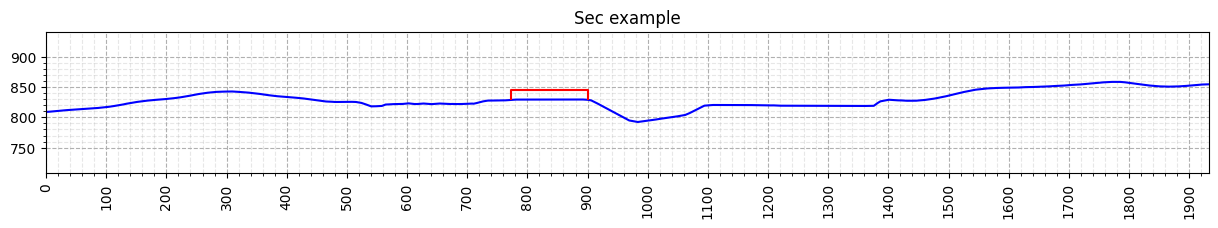

In [6]:
from cfdmod.utils import savefig_to_file
from cfdmod.use_cases.altimetry.plots import plot_surface, plot_profiles, plot_altimetry_profiles
import matplotlib.pyplot as plt
import pathlib

output_path = pathlib.Path("./output/altimetry")

filename = output_path / f"section-{altimetry_section.label}.png"
fig, ax = plot_altimetry_profiles(altimetry_section)
plt.show(fig)
savefig_to_file(fig, filename)

##### Surface plot: DEBUG

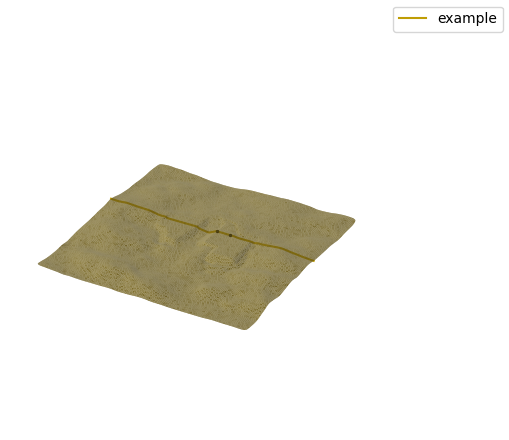

In [7]:
filename = output_path / "debug" / "surface.png"
fig, ax = plot_surface(surface_mesh, [altimetry_section])
plt.show(fig)
savefig_to_file(fig, filename)

##### Profiles plotting: DEBUG

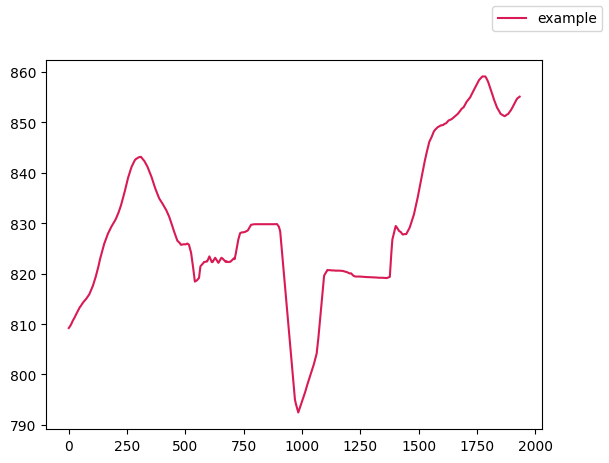

In [8]:
filename = output_path / "debug" / "profiles.png"
fig, ax = plot_profiles([altimetry_section])
plt.show(fig)
savefig_to_file(fig, filename)